<a href="https://colab.research.google.com/github/G-K-Saber/OpenGLMeshLoader/blob/main/Assignment2CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

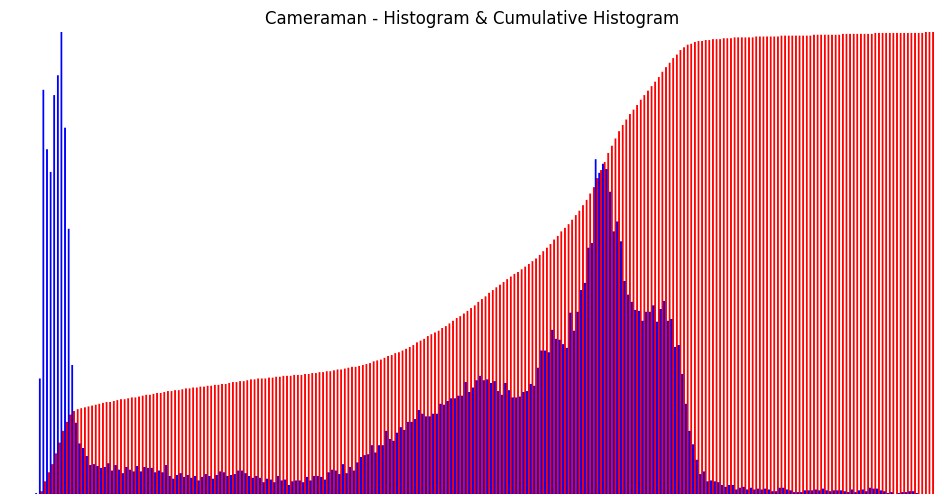

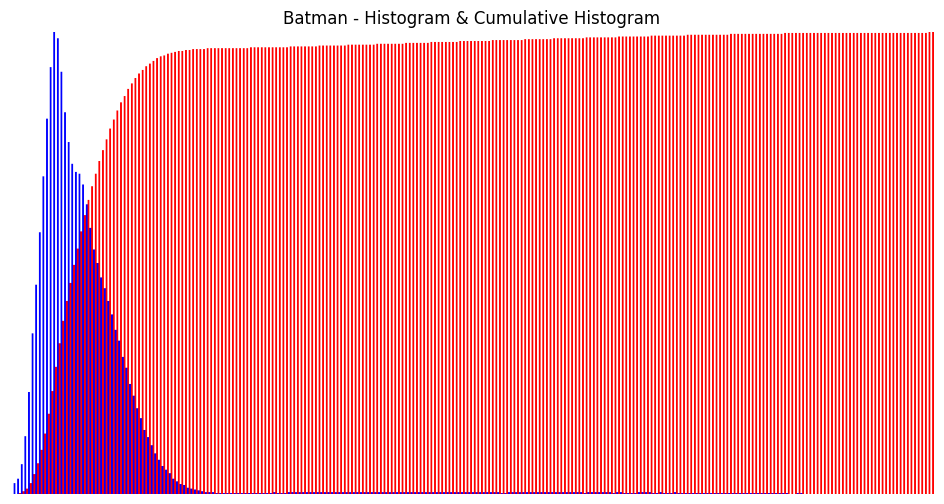

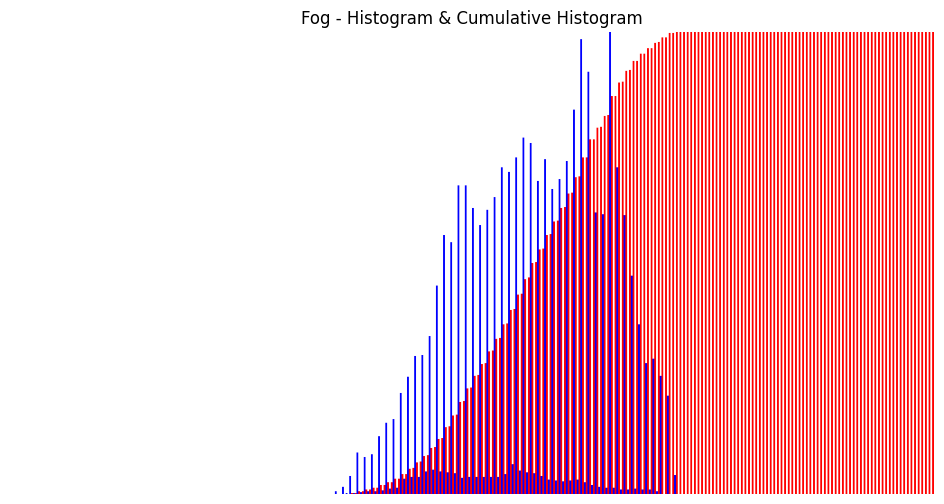

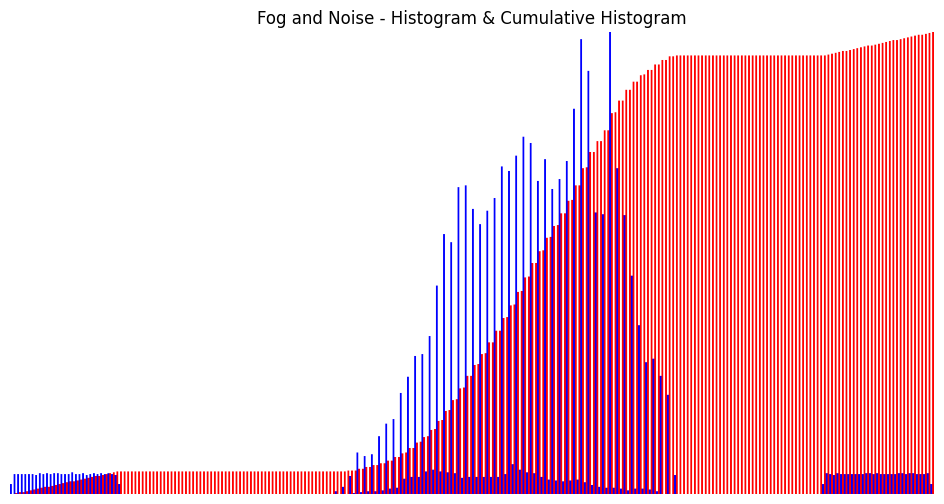

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_histograms(image_path, title='Histogram'):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return

    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()

    if hist.max() == 0:
        print(f"Warning: Histogram of {image_path} is all zeros.")
        return

    # Cumulative histogram
    cum_hist = hist.cumsum()
    cum_hist_normalized = cum_hist * hist.max() / (cum_hist.max() + 1e-5)

    # Normalize both histograms to 512 height
    hist_norm = hist * 512 / (hist.max() + 1e-5)
    cum_hist_norm = cum_hist_normalized * 512 / (hist.max() + 1e-5)

    # Canvas size
    width = 1024
    height = 512
    bin_width = 4

    canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

    for i in range(256):
        x = i * bin_width
        # Draw blue bar for normal histogram
        cv2.rectangle(canvas, (x, height), (x + 1, height - int(hist_norm[i])), (255, 0, 0), -1)
        # Draw red bar for cumulative histogram
        cv2.rectangle(canvas, (x + 2, height), (x + 3, height - int(cum_hist_norm[i])), (0, 0, 255), -1)

    # Show with matplotlib
    canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas_rgb)
    plt.title(f'{title} - Histogram & Cumulative Histogram')
    plt.axis('off')
    plt.show()

# Example usage
show_histograms('cameraman.png', 'Cameraman')
show_histograms('bat.png', 'Batman')
show_histograms('fog.png', 'Fog')
show_histograms('fognoise.png', 'Fog and Noise')

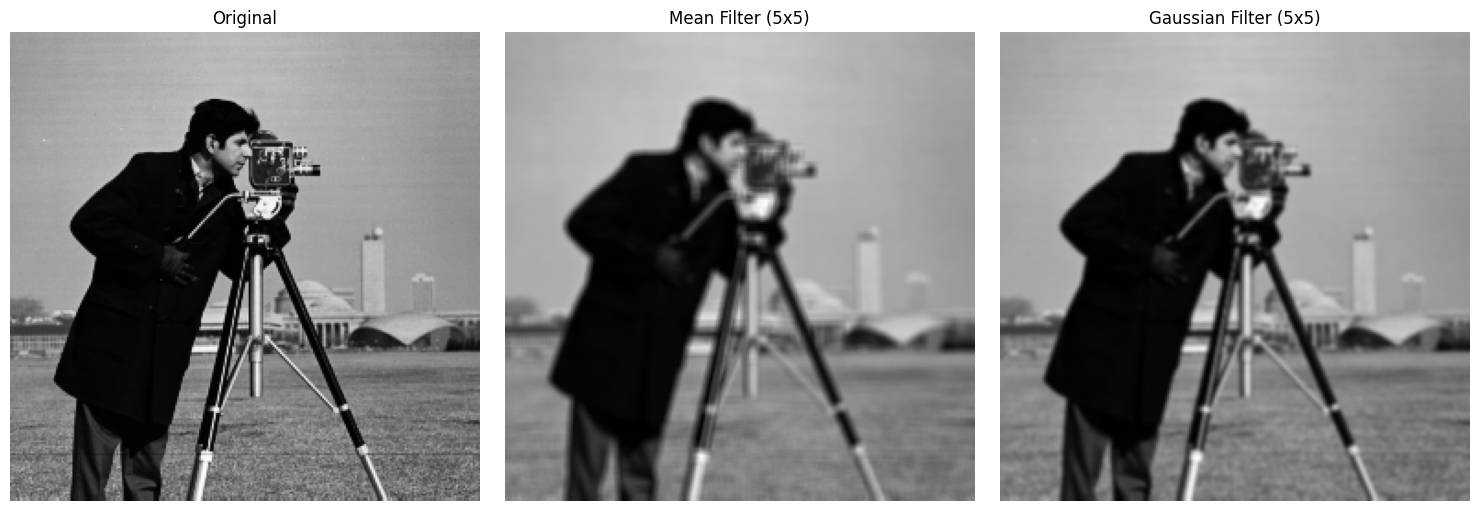

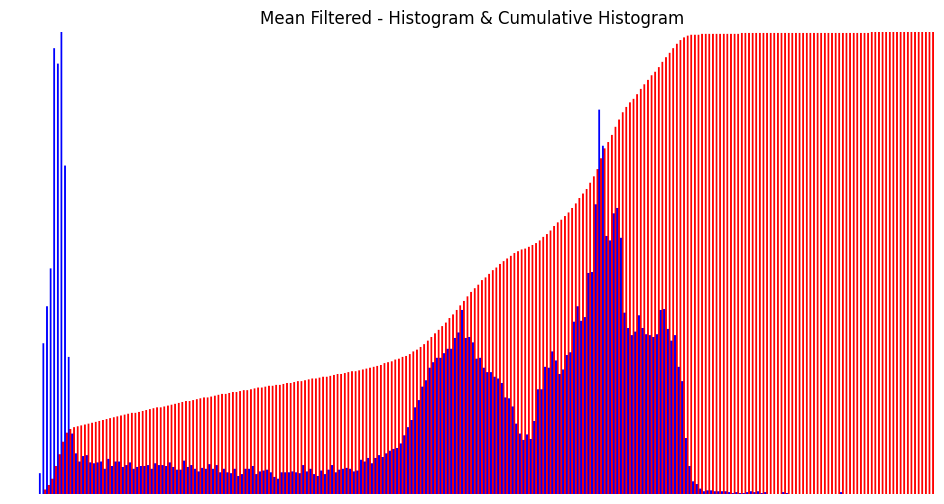

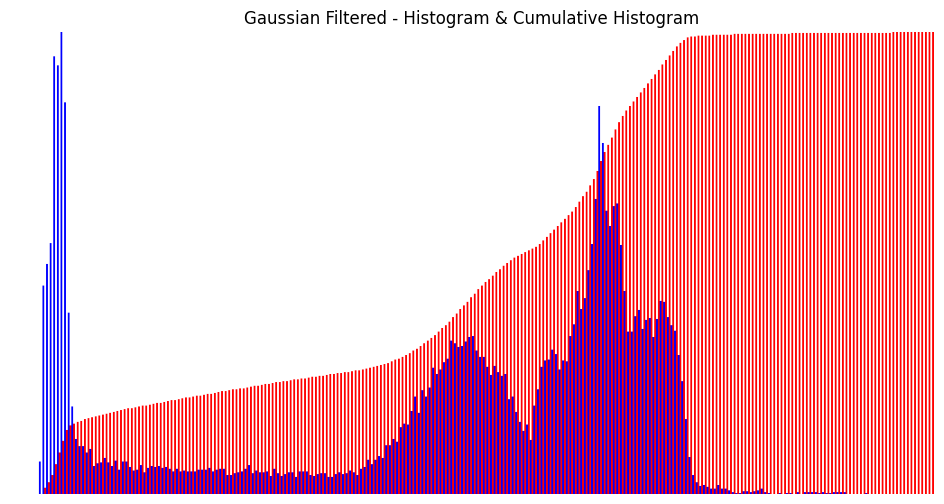

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_and_show_filters(image_path):
    # Load original image
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f"❌ Error: Could not load image at {image_path}")
        return

    # Apply filters
    mean_filtered = cv2.blur(original, (5, 5))
    gaussian_filtered = cv2.GaussianBlur(original, (5, 5), 0)

    # Show images
    titles = ['Original', 'Mean Filter (5x5)', 'Gaussian Filter (5x5)']
    images = [original, mean_filtered, gaussian_filtered]

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Show histograms
    show_histograms_array(mean_filtered, 'Mean Filtered')
    show_histograms_array(gaussian_filtered, 'Gaussian Filtered')

def show_histograms_array(img, title='Histogram'):
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cum_hist = hist.cumsum()
    cum_hist_normalized = cum_hist * hist.max() / (cum_hist.max() + 1e-5)

    # Normalize
    hist_norm = hist * 512 / (hist.max() + 1e-5)
    cum_hist_norm = cum_hist_normalized * 512 / (hist.max() + 1e-5)

    width = 1024
    height = 512
    bin_width = 4

    canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

    for i in range(256):
        x = i * bin_width
        cv2.rectangle(canvas, (x, height), (x + 1, height - int(hist_norm[i])), (255, 0, 0), -1)
        cv2.rectangle(canvas, (x + 2, height), (x + 3, height - int(cum_hist_norm[i])), (0, 0, 255), -1)

    canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas_rgb)
    plt.title(f'{title} - Histogram & Cumulative Histogram')
    plt.axis('off')
    plt.show()

# === Run for Cameraman ===
apply_and_show_filters('cameraman.png')

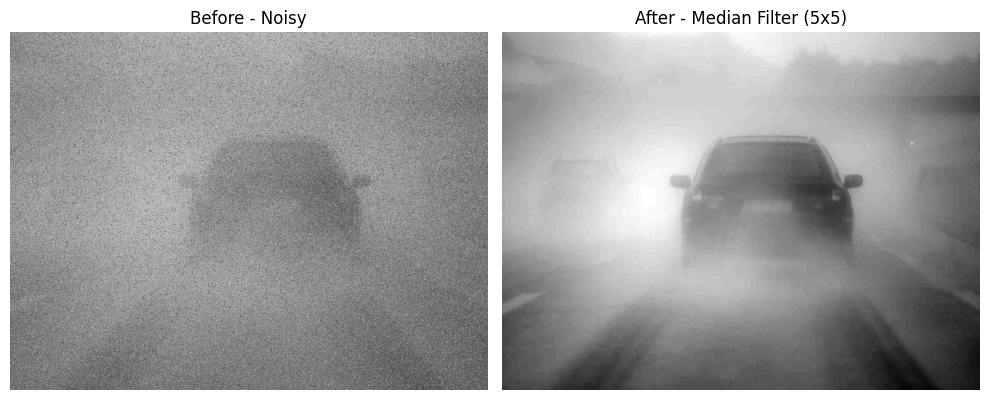

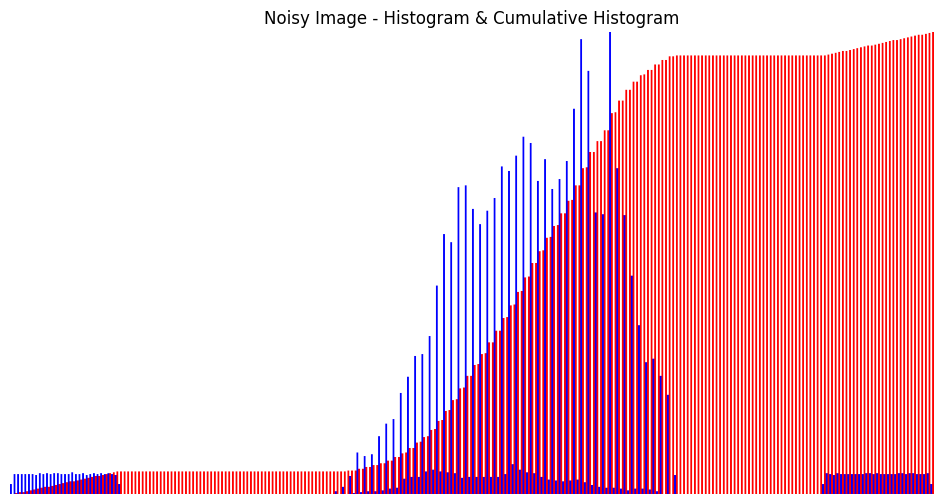

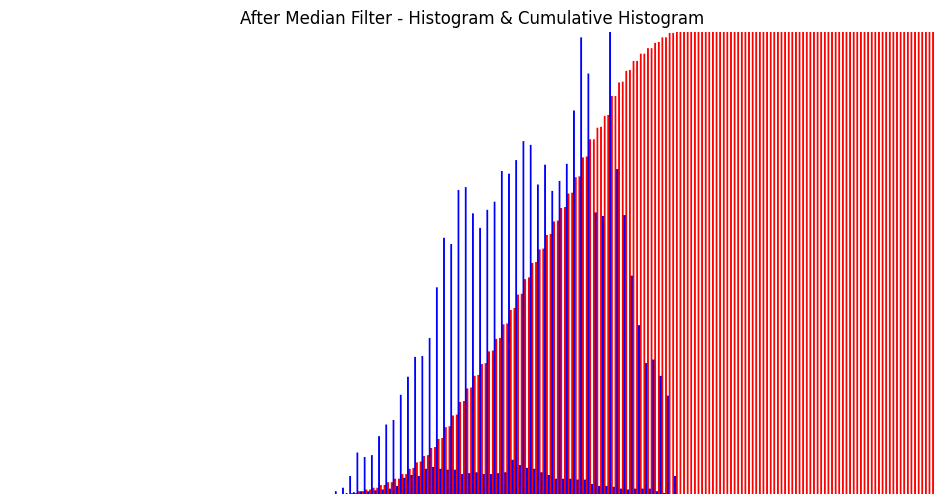

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter_comparison(image_path):
    # Load noisy image
    noisy = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if noisy is None:
        print(f"❌ Error: Could not load image at {image_path}")
        return

    # Apply 5x5 median filter
    denoised = cv2.medianBlur(noisy, 5)

    # Show original vs filtered
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy, cmap='gray')
    plt.title('Before - Noisy')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title('After - Median Filter (5x5)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Show histograms
    show_histograms_array(noisy, 'Noisy Image')
    show_histograms_array(denoised, 'After Median Filter')

def show_histograms_array(img, title='Histogram'):
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cum_hist = hist.cumsum()
    cum_hist_normalized = cum_hist * hist.max() / (cum_hist.max() + 1e-5)

    # Normalize
    hist_norm = hist * 512 / (hist.max() + 1e-5)
    cum_hist_norm = cum_hist_normalized * 512 / (hist.max() + 1e-5)

    width = 1024
    height = 512
    bin_width = 4

    canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

    for i in range(256):
        x = i * bin_width
        cv2.rectangle(canvas, (x, height), (x + 1, height - int(hist_norm[i])), (255, 0, 0), -1)
        cv2.rectangle(canvas, (x + 2, height), (x + 3, height - int(cum_hist_norm[i])), (0, 0, 255), -1)

    canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas_rgb)
    plt.title(f'{title} - Histogram & Cumulative Histogram')
    plt.axis('off')
    plt.show()

# === Run for Fog and Noise ===
median_filter_comparison('fognoise.png')

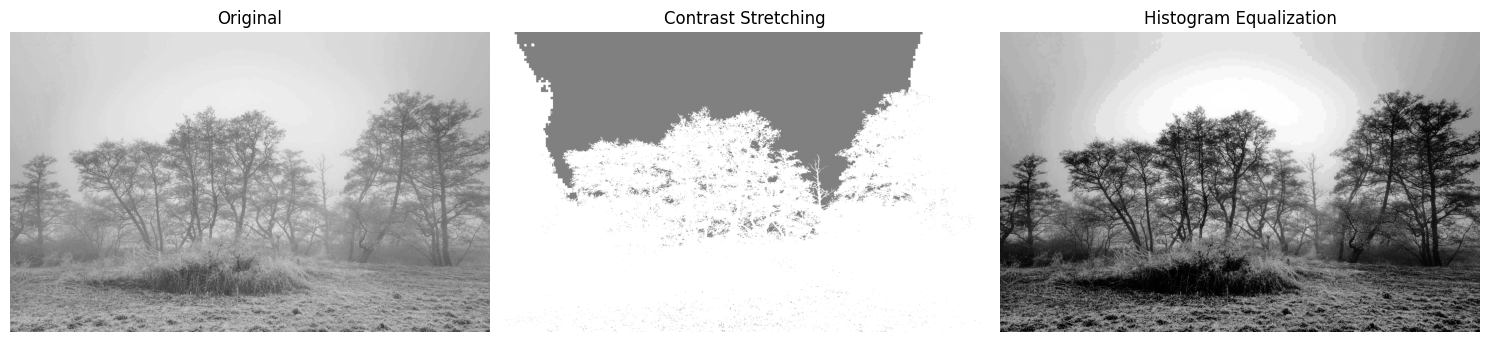

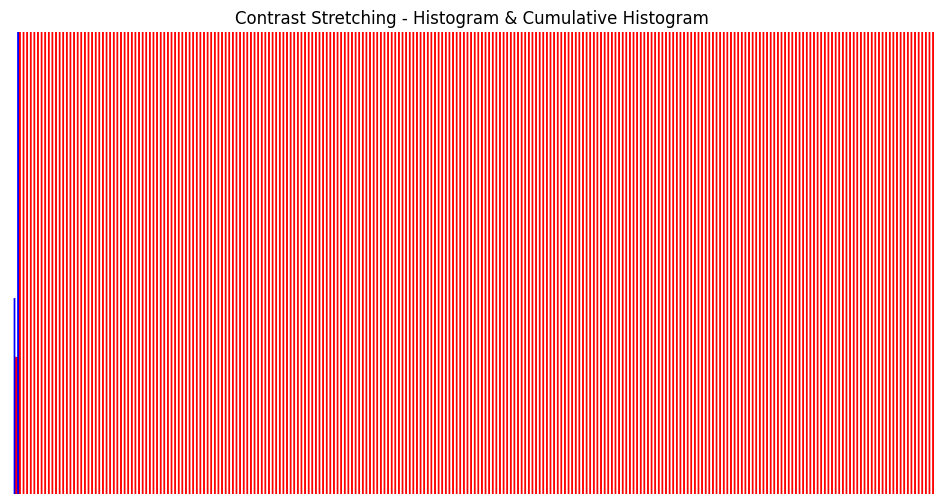

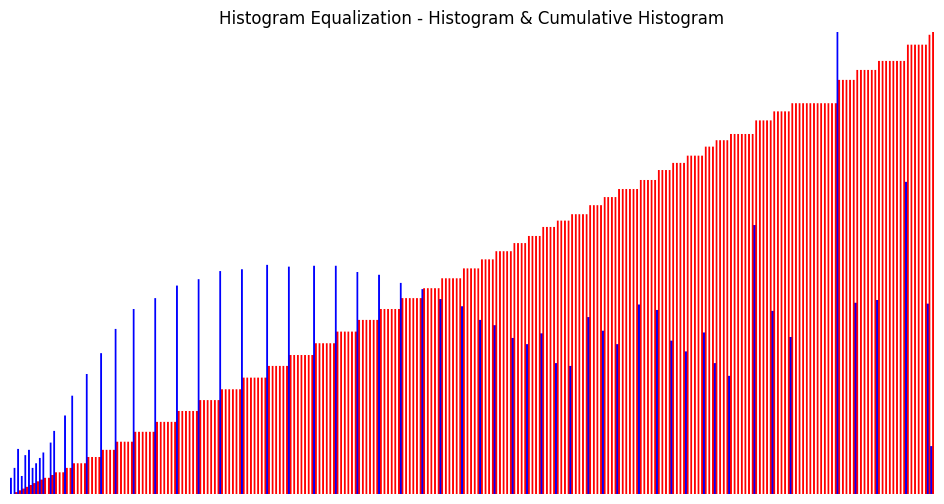

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_enhancement(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Error: Could not load image at {image_path}")
        return

    # --- 1. Contrast Stretching ---
    min_val = np.min(img)
    max_val = np.max(img)
    contrast_stretched = ((img - min_val) * 255 / (max_val - min_val)).astype(np.uint8)

    # --- 2. Histogram Equalization ---
    hist_equalized = cv2.equalizeHist(img)

    # Show original vs enhanced
    titles = ['Original', 'Contrast Stretching', 'Histogram Equalization']
    images = [img, contrast_stretched, hist_equalized]

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Show histograms
    show_histograms_array(contrast_stretched, 'Contrast Stretching')
    show_histograms_array(hist_equalized, 'Histogram Equalization')

def show_histograms_array(img, title='Histogram'):
    # Compute histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cum_hist = hist.cumsum()
    cum_hist_normalized = cum_hist * hist.max() / (cum_hist.max() + 1e-5)

    # Normalize
    hist_norm = hist * 512 / (hist.max() + 1e-5)
    cum_hist_norm = cum_hist_normalized * 512 / (hist.max() + 1e-5)

    width = 1024
    height = 512
    bin_width = 4

    canvas = np.ones((height, width, 3), dtype=np.uint8) * 255

    for i in range(256):
        x = i * bin_width
        cv2.rectangle(canvas, (x, height), (x + 1, height - int(hist_norm[i])), (255, 0, 0), -1)
        cv2.rectangle(canvas, (x + 2, height), (x + 3, height - int(cum_hist_norm[i])), (0, 0, 255), -1)

    canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas_rgb)
    plt.title(f'{title} - Histogram & Cumulative Histogram')
    plt.axis('off')
    plt.show()

# === Run on Frost Fog Image ===
contrast_enhancement('frostfog.png')